In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 10] 

In [3]:
np.load('textin.npy')
np.load('textout.npy')
np.load('traces.npy')

array([[-0.00097656, -0.14355469, -0.09472656, ..., -0.16992188,
        -0.02441406,  0.0625    ],
       [-0.00683594, -0.14941406, -0.09960938, ..., -0.16894531,
        -0.02636719,  0.06054688],
       [-0.0078125 , -0.15039062, -0.10058594, ..., -0.16699219,
        -0.0234375 ,  0.05957031],
       ...,
       [-0.00488281, -0.14648438, -0.09863281, ..., -0.16796875,
        -0.02636719,  0.05859375],
       [-0.00292969, -0.14550781, -0.09765625, ..., -0.16601562,
        -0.0234375 ,  0.06152344],
       [-0.00878906, -0.14648438, -0.10058594, ..., -0.16210938,
        -0.01953125,  0.06640625]])

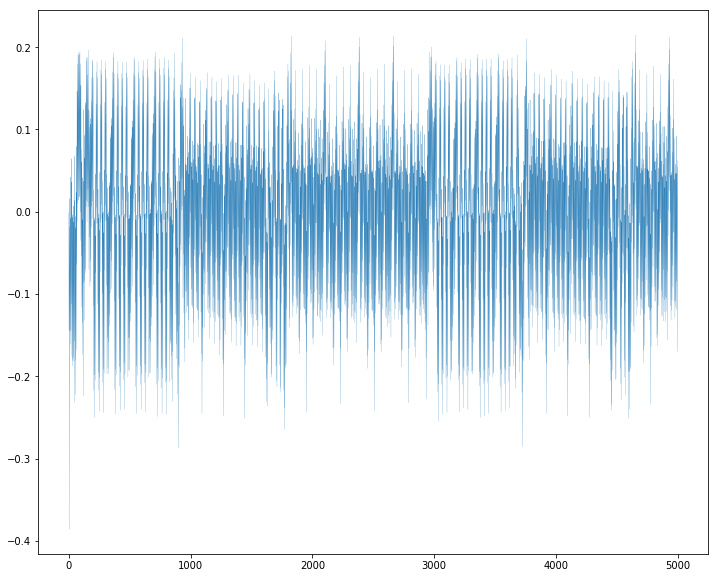

In [4]:
textIn = np.load('textin.npy')
textOut = np.load('textout.npy')
traces = np.load('traces.npy')

traces_amount = len(traces)
meas_amount = len(traces[0])
tmp_traces = np.transpose(traces)   

plt.plot(traces[0], linewidth=0.2)
plt.show()

In [5]:
Sbox = [0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36,
            0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97,
            0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72,
            0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66,
            0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04,
            0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d,
            0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3,
            0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61,
            0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a,
            0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
            0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc,
            0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5,
            0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a,
            0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d,
            0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c,
            0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35,
            0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4,
            0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc,
            0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d, 0x01, 0x02, 0x04, 0x08,
            0x10, 0x20, 0x40, 0x80, 0x1b, 0x36, 0x6c, 0xd8, 0xab, 0x4d, 0x9a,
            0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97, 0x35, 0x6a, 0xd4, 0xb3, 0x7d,
            0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72, 0xe4, 0xd3, 0xbd, 0x61, 0xc2,
            0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66, 0xcc, 0x83, 0x1d, 0x3a, 0x74,
            0xe8, 0xcb ]

hamming_weight = [bin(n).count("1") for n in range(0, 256)]

In [18]:
def cor(x, y):
    
    meanX = np.mean(x)             
    meanY = np.mean(y)
    x = x - meanX                 
    y = y - meanY
    cov = sum(x*y)      
    meanQuadraticX = sum(x ** 2)   
    meanQuadraticY = sum(y ** 2)

    res = cov / np.sqrt(meanQuadraticX * meanQuadraticY)   
    return abs(res)


def cross_all_bytes(texts_in, byte_num, n):
    
    for hyp in range(256):
        leak_array = np.zeros(n)
        for _i in range(n):                     
            # leakage is the hamming weight of processed byte
            leak_array[_i] = hamming_weight[Sbox[texts_in[_i][byte_num] ^ hyp]]
        yield hyp, leak_array

In [20]:
def key_guesses_text(coefs, n=3):
    best_guesses = np.argsort(coefs)[::-1][:n]
    desc = []
    tmpl = "key guess: %02x (%06f)" 
    for guess in np.nditer(best_guesses):
        desc.insert(0, tmpl % (guess, coefs[guess]))
    return ", ".join(desc)



In [ ]:
key = np.zeros(16)
# for each key byte
for key_byte_num in range(16):
    maxcpa = np.zeros(256)
    maxtime=np.zeros(256)
    # for each key guess at key_byte_num place
    for key_guess in range(0, 256):
        # calculate leakage for data on each trace
        hyp = np.zeros(traces)
        for tnum in range(traces):
            hyp[tnum] = leakage(textin[tnum][key_byte_num], key_guess)
        [corr, timemoment] = correlation(hyp)
        maxcpa[key_guess] = corr
        maxtime[key_guess]=timemoment
    key[key_byte_num] = np.argmax(maxcpa)
    print("Time: %d Position #%02d: %s" % (maxtime[np.argmax(maxcpa)], key_byte_num, key_guesses_text(maxcpa)))

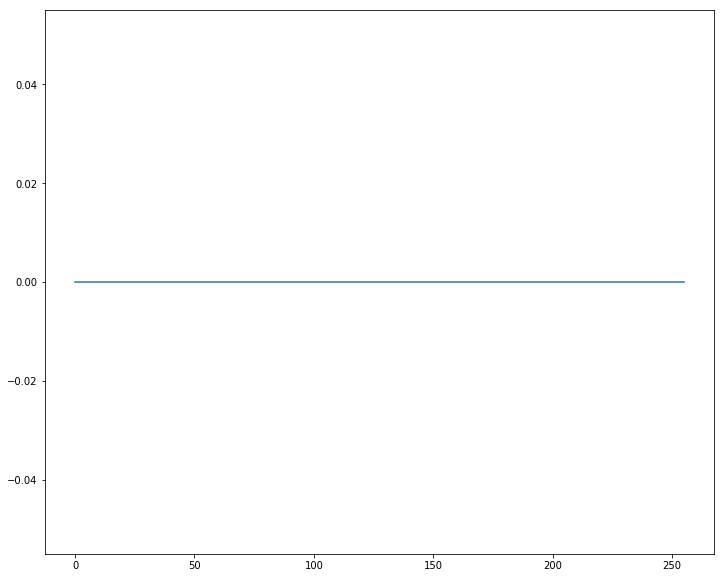

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


In [27]:
plt.plot(maxcpa)
plt.show()
np.save('traces.npy',key)
key1=np.load('traces.npy')
key2=key1.astype('B')
key3=key2.tobytes()
key4=key3
key4
print (bytes(key4))
#key4=b'\x4e\x3b\xfd\xcf\x75\x0a\xcb\x9a\x4e\x9e\xd4\xc8\x37\x0f\x3c\xcc'